In [1]:
using SymPy

In [2]:
using PyPlot

# Ejercicio 1

In [3]:
y,z=symbols("y,z");

In [4]:
function derivada_numerica(f,x,h)
    g=(f(x+h)-f(x))/h
    return g
end;

In [11]:
function Newton(f,x,h,t)
a=x
    w(z)=z-a-f(z,t)*h
    for i in 1000
            k=w(a)
        r=derivada_numerica(w,a,0.001)
        a=a-(k/r)
            i+=1
        end
    return a
end;

In [18]:
function metodo_euler_implicito(f,x0,t0,tf,h)
    listt=Float64[t0]
    listx=Float64[x0]
    t=t0
    j=1
    while j<(tf-t0)/h
        x=listx[j]
         t=t+h
        d=Newton(f,x,h,t)
        push!(listx,d)
        push!(listt,t)
        j+=1
    end
    return listt,listx
end;

# Ejercicio 2

In [22]:
function metodo_euler_punto_medio(f,x0,t0,tf,h)
    listt=Float64[t0]
    listx=Float64[x0]
    t=t0
    j=1
    while j<(tf-t0)/h
        x=listx[j]
        k=(h/2)*f(x,t)
        p=t+(1/2)*h
        push!(listx,x+h*f(x+k,p))
        push!(listt,t)
        t=t+h
        j+=1
    end
    return listt,listx
end;

# Ejercicio 3

In [32]:
function Runge_Kutta_4(f,x0,t0,tf,h)
    listt=Float64[t0]
    listx=Float64[x0]
    t=t0
    j=1
    while j<(tf-t0)/h
        x=listx[j]
        p=t+(1/2)*h
        k1=f(x,t)
        k2=f(x+(h/2)*k1,p)
        k3=f(x+(h/2)*k2,p)
        k4=f(x+h*k3,t)
        push!(listx,x+(h/6)*(k1+2*k2+2*k3+k4))
        push!(listt,t)
        t=t+h
        j+=1
    end
    return listt,listx
end;

# Ejercicio 4

In [35]:
f(x,t)=-2.5*x;

In [36]:
w1,q1=metodo_euler_implicito(f,1,0,8,1);

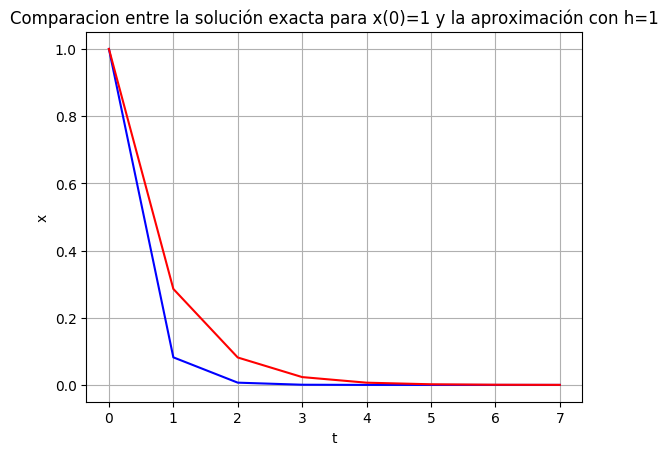

In [37]:
xlabel("t")
ylabel("x")
title("Comparacion entre la solución exacta para x(0)=1 y la aproximación con h=1")
grid("on")
plot(w1,exp.(-2.5*w1),color="blue")
plot(w1,q1,color="red")
show();

In [38]:
w2,q2=metodo_euler_implicito(f,1,0,8,0.5);

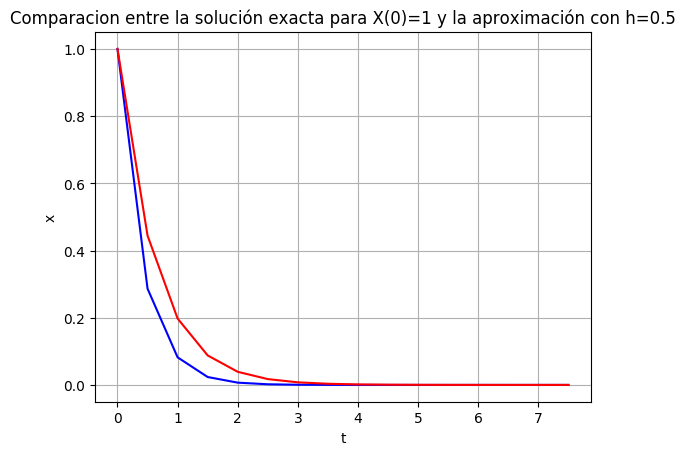

In [39]:
xlabel("t")
ylabel("x")
title("Comparacion entre la solución exacta para X(0)=1 y la aproximación con h=0.5")
grid("on")
plot(w2,exp.(-2.5*w2),color="blue")
plot(w2,q2,color="red")
show();

In [40]:
w3,q3=metodo_euler_implicito(f,1,0,8,0.2);

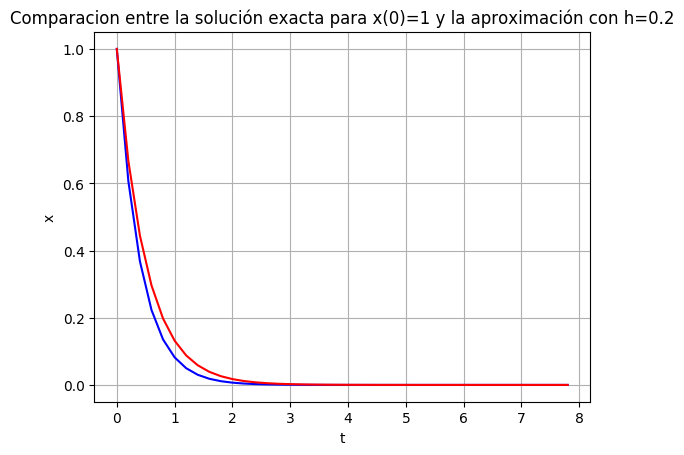

In [41]:
xlabel("t")
ylabel("x")
title("Comparacion entre la solución exacta para x(0)=1 y la aproximación con h=0.2")
grid("on")
plot(w3,exp.(-2.5*w3),color="blue")
plot(w3,q3,color="red")
show();

In [42]:
w4,q4=metodo_euler(f,1,0,8,0.01);

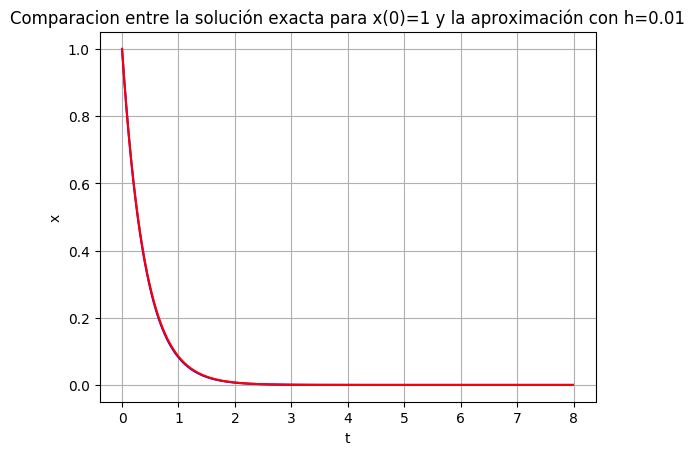

In [44]:
xlabel("t")
ylabel("x")
title("Comparacion entre la solución exacta para x(0)=1 y la aproximación con h=0.01")
grid("on")
plot(w4,exp.(-2.5*w4),color="blue")
plot(w4,q4,color="red")
show();

In [45]:
w5,q5=metodo_euler(f,2,0,8,1);

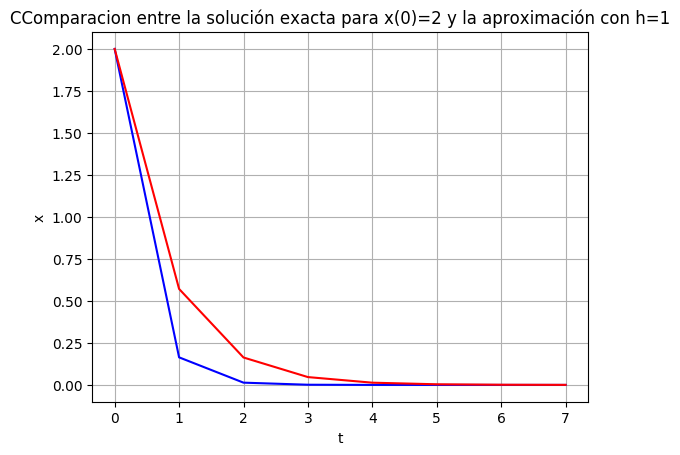

In [46]:
xlabel("t")
ylabel("x")
title("CComparacion entre la solución exacta para x(0)=2 y la aproximación con h=1")
grid("on")
plot(w5,2*exp.(-2.5*w5),color="blue")
plot(w5,q5,color="red")
show();

In [47]:
w6,q6=metodo_euler(f,2,0,8,0.5);

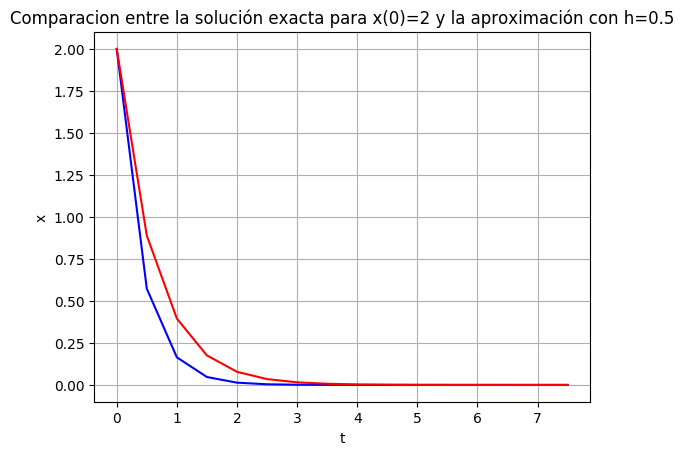

In [48]:
xlabel("t")
ylabel("x")
title("Comparacion entre la solución exacta para x(0)=2 y la aproximación con h=0.5")
grid("on")
plot(w6,2*exp.(-2.5*w6),color="blue")
plot(w6,q6,color="red")
show();

In [49]:
w7,q7=metodo_euler(f,2,0,8,0.2);

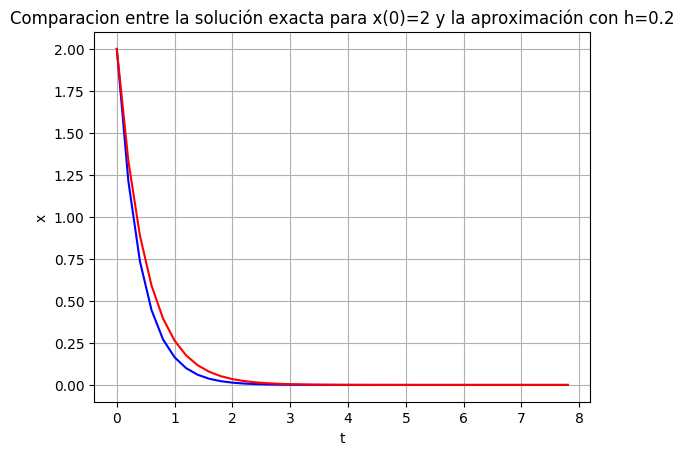

In [50]:
xlabel("t")
ylabel("x")
title("Comparacion entre la solución exacta para x(0)=2 y la aproximación con h=0.2")
grid("on")
plot(w7,2*exp.(-2.5*w7),color="blue")
plot(w7,q7,color="red")
show();

In [51]:
w8,q8=metodo_euler(f,2,0,8,0.01);

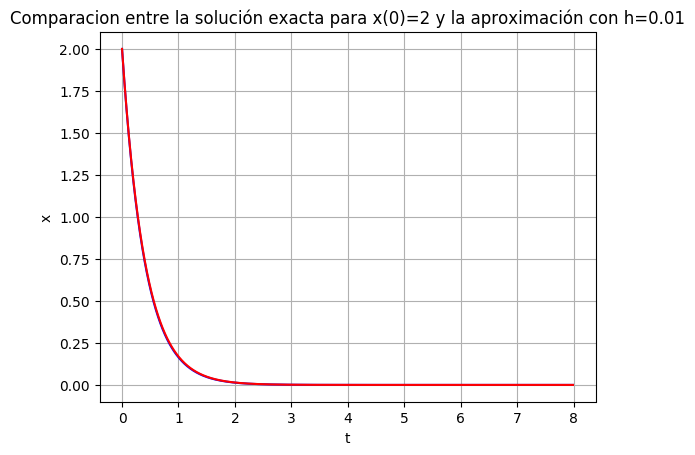

In [52]:
xlabel("t")
ylabel("x")
title("Comparacion entre la solución exacta para x(0)=2 y la aproximación con h=0.01")
grid("on")
plot(w8,2*exp.(-2.5*w8),color="blue")
plot(w8,q8,color="red")
show();

# Ejercicio 5

In [53]:
g(x,t)=(2*x-18*t)/(t+1);

In [55]:
a,s=metodo_euler_punto_medio(g,4,0,10,0.01);

In [59]:
k=length(a)
v=zeros(k)
for i in 1:length(a)
    b=a[i]
    v[i]=4+8*b-5*(b^2)
end;

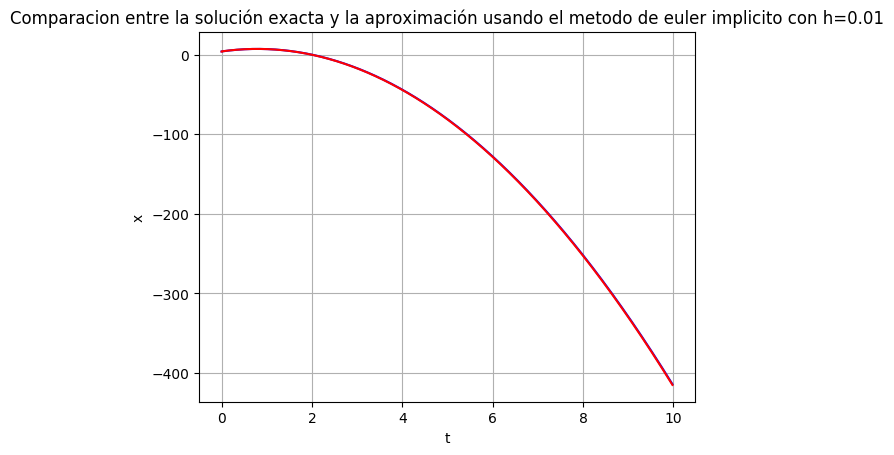

In [61]:
xlabel("t")
ylabel("x")
title("Comparacion entre la solución exacta y la aproximación usando el metodo de euler implicito con h=0.01")
grid("on")
plot(a,v,color="blue")
plot(a,s,color="red")
show();

In [62]:
l,b=Runge_Kutta_4(g,4,0,10,0.01);

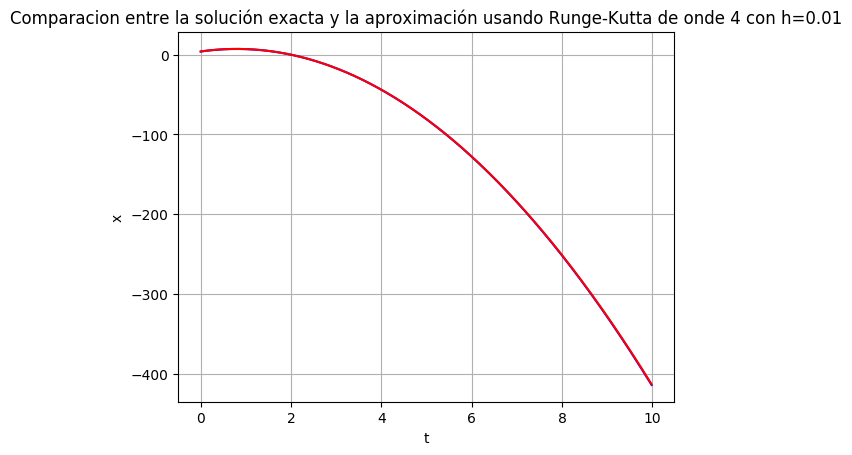

In [64]:
xlabel("t")
ylabel("x")
title("Comparacion entre la solución exacta y la aproximación usando Runge-Kutta de onde 4 con h=0.01")
grid("on")
plot(a,v,color="blue")
plot(l,b,color="red")
show();

# Ejercicio 6

In [91]:
function metodo_euler_oscilador(x0,u0,t0,tf,h,k)
    listt=Float64[t0]
    listx=Float64[x0]
    listu=Float64[u0]
    t=t0
    i=1
    while i<(tf-t0)/h
        x=listx[i]
        u=listu[i]
        p=x+u*h
        l=u-k*x*h
        push!(listx,p)
        push!(listu,l)
        t=t+h
        push!(listt,t)
        i+=1
    end
    return listt,listx,listu
end;

In [113]:
q,r,v=metodo_euler_oscilador(0,5,0,10,0.1,2);

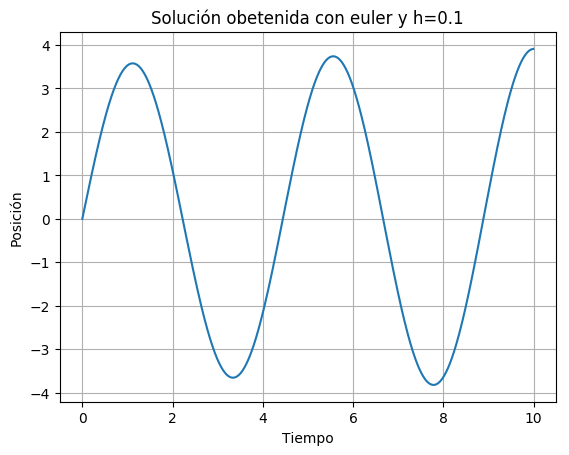

In [130]:
xlabel("Tiempo")
ylabel("Posición")
title("Solución obetenida con euler y h=0.1")
grid("on")
plot(q,r);


In [101]:
function Runge_Kutta_4_oscilador(x0,u0,t0,tf,h,k)
    listt=Float64[t0]
    listx=Float64[x0]
    listu=Float64[u0]
    t=t0
    j=1
    while j<(tf-t0)/h
        x=listx[j]
        u=listu[j]
        k1=u
        k2=u+(h/2)*k1
        k3=u+(h/2)*k2
        k4=u+h*k3
        push!(listx,x+(h/6)*(k1+2*k2+2*k3+k4))
        s1=-k*x
        s2=-k*(x+(h/2)*s1)
        s3=-k*(x+(h/2)*s2)
        s4=-k*(x+h*s3)
        push!(listu,u+(h/6)*(s1+2*s2+2*s3+s4))
        push!(listt,t)
        t=t+h
        j+=1
    end
    return listt,listx,listu
end;

In [115]:
q1,r1,v1=Runge_Kutta_4_oscilador(0,5,0,10,0.1,2);

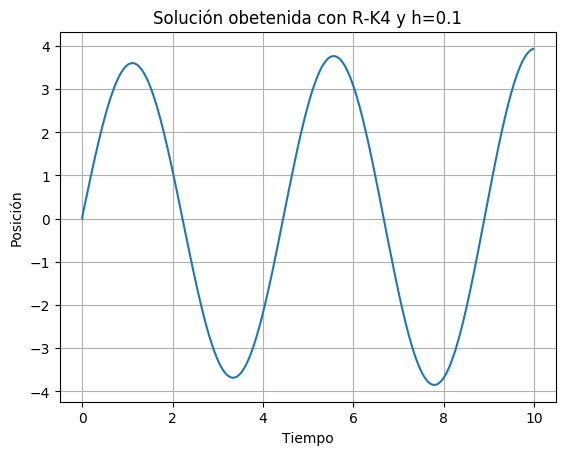

In [129]:
xlabel("Tiempo")
ylabel("Posición")
title("Solución obetenida con R-K4 y h=0.1")
grid("on")
plot(q1,r1);

# Ejercicio 7

In [117]:
q,r,v=metodo_euler_oscilador(0,5,0,10,0.01,2);

In [121]:
q1,r1,v1=Runge_Kutta_4_oscilador(0,5,0,10,0.01,2);

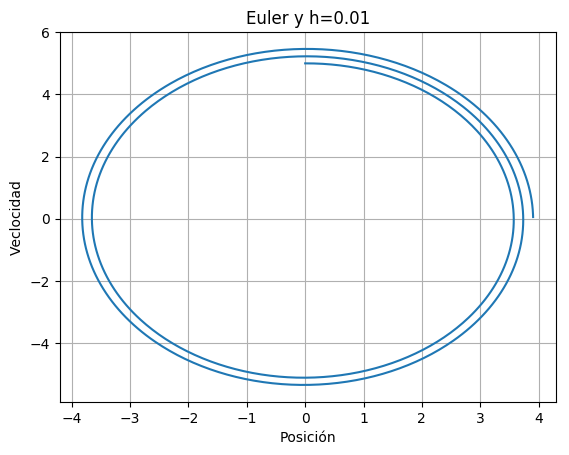

In [131]:
xlabel("Posición")
ylabel("Veclocidad")
title("Euler y h=0.01")
grid("on")
plot(r,v);

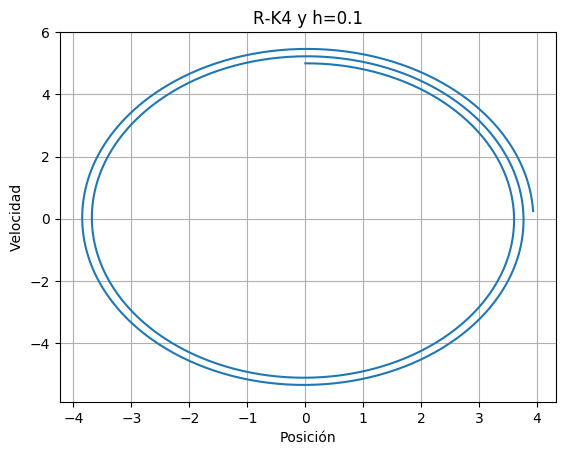

In [134]:
xlabel("Posición")
ylabel("Velocidad")
title("R-K4 y h=0.1")
grid("on")
plot(r1,v1);

# Ejercicio 8